# Experiment: finding invariants in social groups

In [80]:
import os, sys
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path) 

#from treelib import Node, Tree
#from copy import deepcopy as dcp

import pandas as pd
import numpy as np
import math

if 'pygents.util' in sys.modules:
    del sys.modules['pygents.util']
from pygents.util import *
if 'pygents.token_plot' in sys.modules:
    del sys.modules['pygents.token_plot']
from pygents.plot import *


In [5]:
data_columns = ['_id','male','female','age_young','age_adult','age_senior','live_home_city','married','value_family','value_fairness','value_development','smoking_alchogol','profile_relatives','profile_media']
data = [
    (1,1,0,1,0,0,1,0,0,1,1,1,0,10),#age_young&male&live_home_city&value_fairness&value_development&smoking_alchogol&profile_media
    (2,1,0,1,0,0,1,0,0,1,1,1,0,10),#age_young&male&live_home_city&value_fairness&value_development&smoking_alchogol&profile_media
    (3,1,0,1,0,0,1,0,0,1,1,1,0,10),#age_young&male&live_home_city&value_fairness&value_development&smoking_alchogol&profile_media
    (4,0,1,0,1,0,1,1,1,1,0,0,10,1),#age_adult&female&live_home_city&married&value_family&value_fairness&profile_relatives
    (5,0,1,0,1,0,1,1,1,1,0,0,10,1),#age_adult&female&live_home_city&married&value_family&value_fairness&profile_relatives
    (6,0,1,0,1,0,1,1,1,1,0,0,10,1),#age_adult&female&live_home_city&married&value_family&value_fairness&profile_relatives
    (7,1,0,1,0,0,1,0,0,1,1,1,0,10),#age_young&male&live_home_city&value_fairness&value_development&smoking_alchogol&profile_media
    (8,1,0,1,0,0,1,0,0,1,1,1,0,10),#age_young&male&live_home_city&value_fairness&value_development&smoking_alchogol&profile_media
    (9,0,1,0,1,0,1,1,1,1,0,0,10,1),#age_adult&female&live_home_city&married&value_family&value_fairness&profile_relatives
    (10,0,1,0,1,0,1,1,1,1,0,0,10,1),#age_adult&female&live_home_city&married&value_family&value_fairness&profile_relatives
    (11,1,0,1,0,0,1,0,0,1,1,1,0,10),#age_young&male&live_home_city&value_fairness&value_development&smoking_alchogol&profile_media
    (12,0,1,0,1,0,1,1,1,1,0,0,10,1),#age_adult&female&live_home_city&married&value_family&value_fairness&profile_relatives
    (13,1,0,0,1,0,0,1,1,1,0,1,0,0),#age_adult&male&married&value_family&value_fairness&smoking_alchogol
    (14,1,0,0,1,0,0,1,1,1,0,1,0,0),#age_adult&male&married&value_family&value_fairness&smoking_alchogol
    (15,1,0,0,1,0,0,1,1,1,0,1,0,0),#age_adult&male&married&value_family&value_fairness&smoking_alchogol
    (16,0,1,0,0,1,0,0,1,0,0,0,10,10),#age_senior&female&value_family&profile_relatives&profile_media
    (17,0,1,0,0,1,0,0,1,0,0,0,10,10),#age_senior&female&value_family&profile_relatives&profile_media
    (18,0,1,0,0,1,0,0,1,0,0,0,10,10),#age_senior&female&value_family&profile_relatives&profile_media
    (19,1,0,0,1,0,0,0,0,0,0,1,0,0),#age_adult&male&smoking_alchogol
    (19,0,1,0,1,0,0,1,0,0,1,0,0,0),#age_adult&female&live_home_city&value_development
]

test_df = pd.DataFrame(data,columns=data_columns)

for c in test_df.columns:
    if c.endswith('_id'):
        continue
    test_df[c] = test_df[c].astype(float)

test_df


,_id,male,female,age_young,age_adult,age_senior,live_home_city,married,value_family,value_fairness,value_development,smoking_alchogol,profile_relatives,profile_media
0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,10.0
1,2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,10.0
2,3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,10.0
3,4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,10.0,1.0
4,5,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,10.0,1.0
5,6,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,10.0,1.0
6,7,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,10.0
7,8,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,10.0
8,9,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,10.0,1.0
9,10,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,10.0,1.0


In [10]:
col_metrics = []
for c in test_df.columns:
    if c.endswith('_id'):
        continue
    minval = test_df[c].min()
    maxval = test_df[c].max()
    meanval = test_df[c].mean()
    if minval == maxval:
        continue
    col_metrics.append((c,minval,maxval,meanval))

col_df = pd.DataFrame(col_metrics,columns=['name','min','max','mean'])
col_df.sort_values('max', ascending=False,inplace=True)
col_df


,name,min,max,mean
11,profile_relatives,0.0,10.0,4.50
12,profile_media,0.0,10.0,4.80
0,male,0.0,1.0,0.50
1,female,0.0,1.0,0.50
2,age_young,0.0,1.0,0.30
3,age_adult,0.0,1.0,0.55
4,age_senior,0.0,1.0,0.15
5,live_home_city,0.0,1.0,0.60
6,married,0.0,1.0,0.50
7,value_family,0.0,1.0,0.60


In [31]:
graph = {}
corrs = []
collen = len(test_df.columns)
for i1 in range(1,collen):
    for i2 in range(i1+1,collen):
        c1 = test_df.columns[i1]
        c2 = test_df.columns[i2]
        corr = test_df[c1].corr(test_df[c2])
        if np.isnan(corr):
            continue
        key = tuple(sorted((c1,c2)))
        corrs.append((key,corr))
        countcount(graph,c1,c2,corr)
        countcount(graph,c2,c1,corr)
corr_df = pd.DataFrame(corrs,columns=['key','corr'])
corr_df.sort_values('corr', ascending=False,inplace=True)

print(graph)

corr_df

{'male': {'female': -1.0, 'age_young': 0.6546536707079772, 'age_adult': -0.30151134457776363, 'age_senior': -0.420084025208403, 'live_home_city': 2.266233259184198e-17, 'married': -0.4000000000000001, 'value_family': -0.6123724356957946, 'value_fairness': 0.34641016151377546, 'value_development': 0.5241424183609592, 'smoking_alchogol': 1.0, 'profile_relatives': -0.904534033733291, 'profile_media': 0.2543423420395785}, 'female': {'male': -1.0, 'age_young': -0.6546536707079772, 'age_adult': 0.30151134457776363, 'age_senior': 0.420084025208403, 'live_home_city': -2.266233259184198e-17, 'married': 0.4000000000000001, 'value_family': 0.6123724356957946, 'value_fairness': -0.34641016151377546, 'value_development': -0.5241424183609592, 'smoking_alchogol': -1.0, 'profile_relatives': 0.904534033733291, 'profile_media': -0.2543423420395785}, 'age_young': {'male': 0.6546536707079772, 'female': -0.6546536707079772, 'age_adult': -0.7237468644557454, 'age_senior': -0.2750095491084635, 'live_home_cit

,key,corr
9,"(male, smoking_alchogol)",1.000000
35,"(age_adult, married)",0.904534
21,"(female, profile_relatives)",0.904534
29,"(age_young, value_development)",0.892143
66,"(profile_relatives, value_family)",0.738549
...,...,...
10,"(male, profile_relatives)",-0.904534
75,"(profile_relatives, smoking_alchogol)",-0.904534
41,"(age_adult, profile_media)",-0.996932
20,"(female, smoking_alchogol)",-1.000000


In [115]:
def init_graph_state(graph,state=None,value=0):
    """
    Initialize graph state heat map with value, using all elements of graph subgraphs
    """
    if state is None:
        state = {}
    if type(graph) == dict:
        for key in graph:
            init_graph_state(key,state,value)
            subgraph = graph[key]
            if type(subgraph) == dict:
                init_graph_state(subgraph,state,value)
    elif type(graph) == list or type(graph) == tuple or type(graph) == set:
        for key in graph:
            init_graph_state(key,state,value)
    else:
        state[graph] = value
    return state
assert str(init_graph_state('a')) == "{'a': 0}"
assert str(init_graph_state(['a','b'])) == "{'a': 0, 'b': 0}"
assert str(init_graph_state(('c','d'))) == "{'c': 0, 'd': 0}"
assert str(init_graph_state({'e':10,'f':1})) == "{'e': 0, 'f': 0}"
assert str(init_graph_state({'e':{'a':1,'b':10},'f':{'c':0,'a':100}})) == "{'e': 0, 'a': 0, 'b': 0, 'f': 0, 'c': 0}"
    

def dictnorm(dic,inplace = True):
    new_dic = dic if inplace else {}
    absmax = 0
    for vertex in dic: 
        absheat = abs(dic[vertex])
        if absmax < absheat:
            absmax = absheat
    for vertex in dic:
        normheat = dic[vertex] / absmax
        new_dic[vertex] = normheat
    return new_dic
assert str(dictnorm({'a':-100,'b':0,'c':10})) == "{'a': -1.0, 'b': 0.0, 'c': 0.1}"


def dictabsmax(dic,absmax=0):
    for key in dic:
        absval = abs(dic[key])
        if absmax < absval:
            absmax = absval
    return absmax
assert str(dictabsmax({'c':10,'d':-100})) == "100"
assert str(dictabsmax({'a':1,'b':-10},dictabsmax({'c':10,'d':-100}))) == "100"


def dictminmax(dic,minmax=None):
    minval = None if minmax is None else minmax[0]
    maxval = None if minmax is None else minmax[1]
    for key in dic:
        val = dic[key]
        if maxval is None or maxval < val:
            maxval = val
        if minval is None or minval > val:
            minval = val
    return minval, maxval
assert str(dictminmax({'c':10,'d':-100})) == "(-100, 10)"
assert str(dictminmax({'a':1,'b':-10},dictminmax({'c':10,'d':-100}))) == "(-100, 10)"


def dictstd(dica,dicb):
    dif2 = 0
    cnt = 0
    absmax = 0
    for a in dica:
        v = dica[a] - dicb[a] if a in dicb else dica[a]
        dif2 += v * v
        cnt += 1
    for b in dicb:
        if not b in dica:
            v = dicb[b]
            dif2 += v * v
            cnt += 1
    return math.sqrt(dif2 / cnt)
assert str(dictstd({'a':10},{'a':10})) == "0.0"
assert str(dictstd({'a':-5},{'a':5})) == "10.0"


def dictstdp(dica,dicb):
    std = dictstd(dica,dicb)
    minval, maxval = dictminmax(dica,dictminmax(dicb))
    den = (maxval - minval)
    return 0.0 if std == 0 else std / den 
assert str(dictstdp({'a':10},{'a':10})) == "0.0"
assert str(dictstdp({'a':-5},{'a':5})) == "1.0"
#TODO verify this
assert str(dictstdp({'a':-5},{'b':5})) == "0.5"
assert str(dictstdp({'a':-5,'c':1},{'b':5,'c':1})) == "0.408248290463863"
assert str(dictstdp({'a':-5,'c':10},{'b':5,'c':10})) == "0.2721655269759087"


def predict(graph, properties, threshold=0.01, max_cycles = None, debug=False):
    """
    Predict unknown properties by known ones
    """
    # turn properties into weighted dict 
    if type(properties) == list or type(properties) == tuple or type(properties) == set:
        prop_values = {}
        for prop in properties:
            prop_values[prop] = 1.0 # default
        properties = prop_values
    # init blank graph state
    state = init_graph_state(graph)
    # init graph state with fixed inputs
    for key in properties:
        state[key] = properties[key]
    # iterate while state is changing
    std = None
    i = 0
    while std is None or std > threshold:
        # update state
        new_state = {}
        for vertex in state: 
            heat = state[vertex]
            links = graph[vertex] # linkes from vertex
            for linked in links:
                dictcount(new_state, linked, heat * links[linked]) # increase/decrease heat with weight
        dictnorm(new_state) # normalize heatmap
        #TODO real-scale out of range inputs!?
        # fix graph state with fixed inputs
        for key in properties:
            new_state[key] = properties[key]
        # compute std
        std = dictstdp(state, new_state)  
        state = new_state
        i += 1
        if debug:
            print(i,std,new_state)
        if not max_cycles is None and i >= max_cycles:
            break
    return state



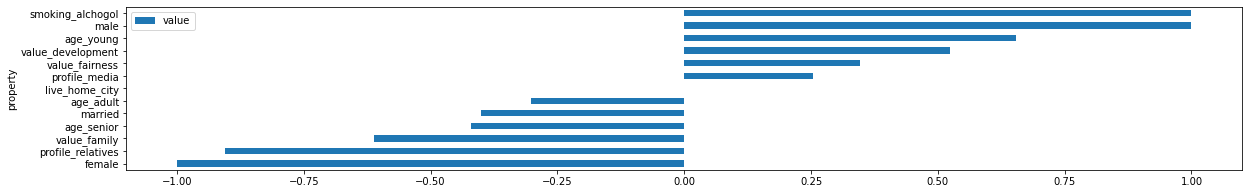

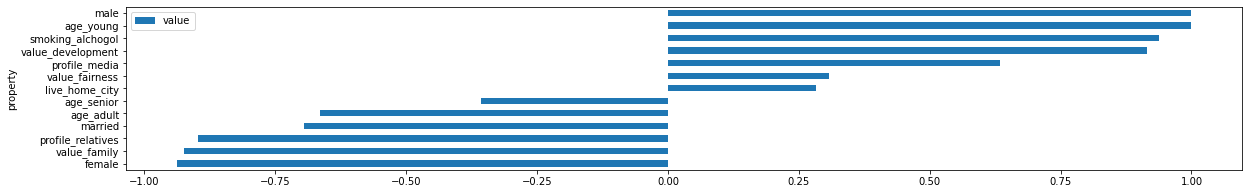

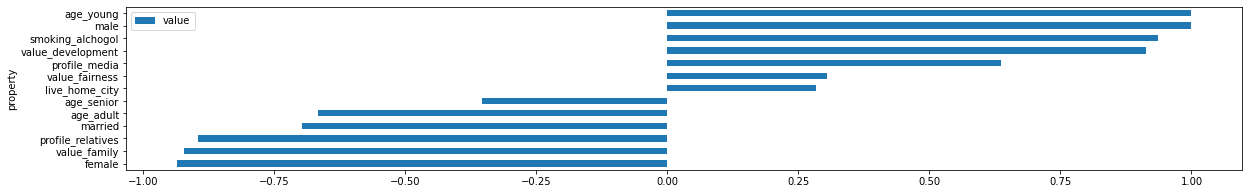

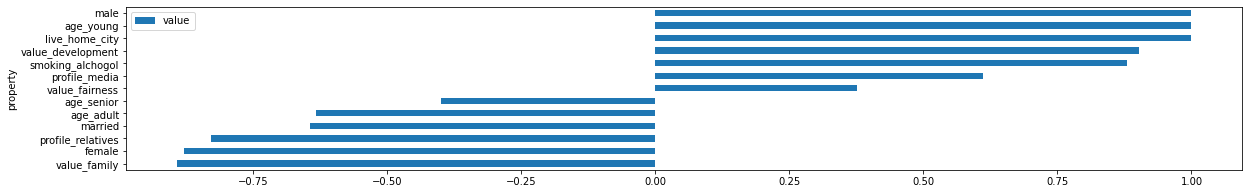

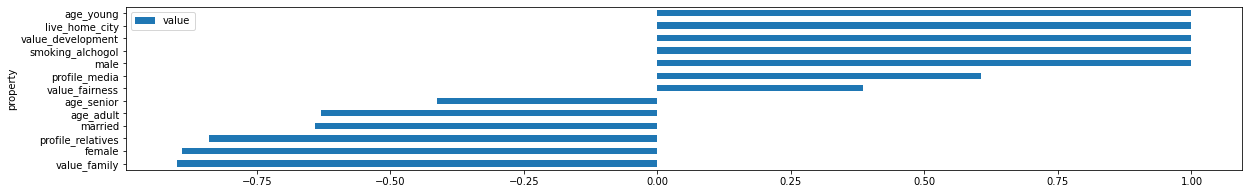

In [116]:
#age_young&male&live_home_city&value_fairness&value_development&smoking_alchogol&profile_media
p = predict(graph,['male'],max_cycles=1)
plot_dict(p,'property','value')
p = predict(graph,['male'])
plot_dict(p,'property','value')
p = predict(graph,['male','age_young'])
plot_dict(p,'property','value')
p = predict(graph,['male','age_young','live_home_city'])
plot_dict(p,'property','value')
p = predict(graph,['male','age_young','live_home_city','value_development','smoking_alchogol'])
plot_dict(p,'property','value')



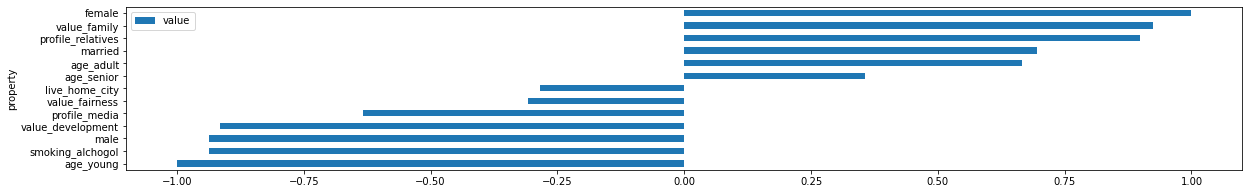

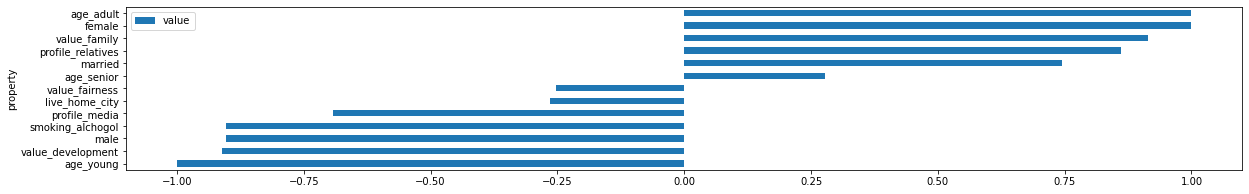

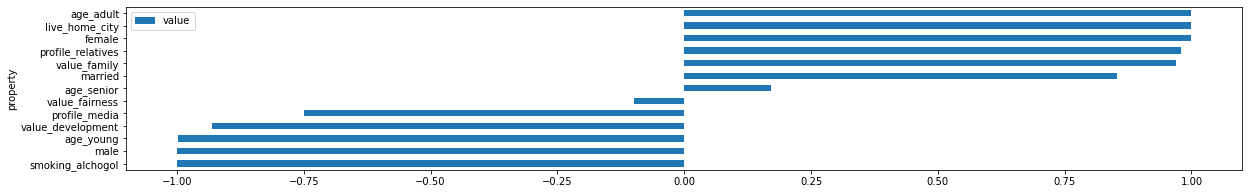

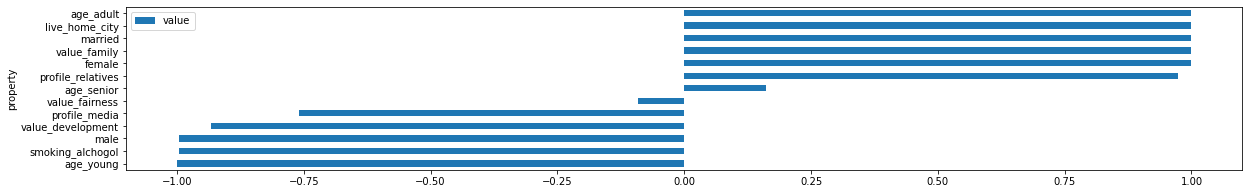

In [117]:
#age_adult&female&live_home_city&married&value_family&value_fairness&profile_relatives
p = predict(graph,['female'])
plot_dict(p,'property','value')
p = predict(graph,['female','age_adult'])
plot_dict(p,'property','value')
p = predict(graph,['female','age_adult','live_home_city'])
plot_dict(p,'property','value')
p = predict(graph,['female','age_adult','live_home_city','married','value_family'])
plot_dict(p,'property','value')


In [106]:
graph['female']

{'male': -1.0,
 'age_young': -0.6546536707079772,
 'age_adult': 0.30151134457776363,
 'age_senior': 0.420084025208403,
 'live_home_city': -2.266233259184198e-17,
 'married': 0.4000000000000001,
 'value_family': 0.6123724356957946,
 'value_fairness': -0.34641016151377546,
 'value_development': -0.5241424183609592,
 'smoking_alchogol': -1.0,
 'profile_relatives': 0.904534033733291,
 'profile_media': -0.2543423420395785}

In [112]:
graph['value_fairness']

{'male': 0.34641016151377546,
 'female': -0.34641016151377546,
 'age_young': 0.3779644730092273,
 'age_adult': 0.17407765595569785,
 'age_senior': -0.727606875108999,
 'live_home_city': 0.7071067811865477,
 'married': 0.34641016151377546,
 'value_family': -1.9626155733547187e-17,
 'value_development': 0.18156825980064065,
 'smoking_alchogol': 0.34641016151377546,
 'profile_relatives': -0.17407765595569785,
 'profile_media': -0.14684461964287043}

In [118]:
test_df[['male','female','value_fairness']]

,male,female,value_fairness
0,1.0,0.0,1.0
1,1.0,0.0,1.0
2,1.0,0.0,1.0
3,0.0,1.0,1.0
4,0.0,1.0,1.0
5,0.0,1.0,1.0
6,1.0,0.0,1.0
7,1.0,0.0,1.0
8,0.0,1.0,1.0
9,0.0,1.0,1.0


In [109]:
test_df['female'].corr(test_df['value_fairness'])

-0.34641016151377546

In [ ]:
#TODO nail down inputs over interations

In [ ]:
#TODO predict by feature (feature prediction)
#TODO predict by list of features (feature prediction)
#TODO map to scales
#TODO predict by list of weighted features (feature prediction)
#TODO predict by list of samples with weighted masked features (gap filling)
#TODO predict by list of samples with weighted unmasked features (clustering)
#TODO all the above on test
#TODO all the above on real train
#TODO all the above on real test
#TODO all the above on real test compared with baseline?
#TODO all the above on real test compared with Demin/Ponomarev?

#TODO same as above based on CBR-kind with counted unique invariants as a links 
